In [0]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install opencv-contrib-python
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
!ls
#!mkdir ter

sample_data


In [0]:
import shutil
#%cd train_images
#!mov test_images.zip,sample_data
shutil.move("train_images.zip", "/content/ter")
#!rm -r train_images
#!ls | wc -l

'/content/ter/train_images.zip'

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/12961/360539/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1556214473&Signature=nXKBG6ji4Q44YrGhn%2FDUb598EQsoe9KvX%2BiEki%2B0tC8L%2FoPXXIN8uLhvGU19jb7wQyWFRDI1FEA5G40i%2BpdjQQl7rVdFlbrb%2FiTkD%2BMp7eXhwvmX0NhauKn2oFfBWJjWvwG7Iiz9QxUVzbM%2FEwAB%2FOGAt%2F8HyAJG3DdGJtV4ZuTp1uX1R6jwwZketzrdB2jRo4v7kWSUnTahRtJy3wEn1CpsXKfMg3EMexYgHc7qCJlCiOA6w%2Fodu%2BvTAShk%2FZG7uJL07KYzYBqsJbkovnxl002OMoLdRT%2Ff2%2Fs6Yk0aQGzwJ5uwBwuIxS6%2BbTjmnN%2Fvk8na2BQF2QjEkaI0vnaIYA%3D%3D" -O "train_images.zip" -c

In [0]:
pwd

'/content/ter'

In [0]:
!unzip -q train_images.zip

In [0]:
%cd ter

[Errno 2] No such file or directory: 'ter'
/content/ter


In [0]:
#shutil.move("test_images.zip", "/content")
import shutil
shutil.move("name.csv", "/content")
%cd //
%cd content
#!ls
#
#kf=pd.read_csv(r'train_lable.csv')

/
/content


In [0]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [0]:
df=pd.read_csv(r'train_lable.csv')
df.head(2)

,Unnamed: 0,category_id
0,0,0
1,1,0


In [0]:
df.tail(1)

,Unnamed: 0,category_id
196085,196085,8


In [0]:
train_labels=df['category_id']

In [0]:
from sklearn.utils import shuffle

X_train,train_labels = shuffle(X_train, train_labels, random_state=0)

In [0]:
dic={0:0,1:1,3:2,4:3,8:4,10:5,11:6,13:7,14:8,16:9,17:10,18:11,19:12,22:13}
train_labels_ = [dic.get(n, n) for n in train_labels]

In [0]:
from keras.utils import np_utils
train_labels = np_utils.to_categorical(train_labels_, 14)

Using TensorFlow backend.


In [0]:
from keras.utils import np_utils
train_labels= np_utils.to_categorical(train_labels,14)

In [0]:
train_labels.shape

(196086, 14)

In [0]:
train =list(df["file_name"])
train_lable=list(df["category_id"])
new_train_label=[]
PATH = os.getcwd()
train_path = PATH+'/ter/'
train_batch = os.listdir(train_path)
for image_id in range (0,196086):
  for i in range (0,196299):
    if train_batch[image_id]==train[i]:
      y=train_lable[i]
      new_train_label.append(y)
kf = pd.DataFrame({'category_id':new_train_label})

In [0]:
from tensorflow import keras
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [0]:
kf.to_csv('/content')

In [0]:
Y_train = df["category_id"]
# Drop 'label' column
X_train = kf["id"]
#X_train = X_train / 255.0
#test = test / 255.0
#X_train = X_train.values.reshape(-1,28,28,1)
#test = test.values.reshape(-1,28,28,1)

In [0]:
for i in range (0,9):
  print (i)

In [0]:
X_train=np.load('gdrive/My Drive/Colab Notebooks/wildcam/X_train.npy')
X_test=np.load('gdrive/My Drive/Colab Notebooks/wildcam/X_test.npy')

In [0]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D



#resnet_weights_path=my_new_model.load_weights('my_model_weights.h5')

#num_classes = 26
resnet_weights_path = 'imagenet'

my_new_model = Sequential()
#my_new_model.add(ResNet152(include_top=False, pooling='avg', weights=resnet_weights_path,input_shape=X_train.shape[1:]))
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path,input_shape=X_train.shape[1:]))
my_new_model.add(Dense(14, activation='softmax'))

# Indicate whether the first layer should be trained/changed or not.
my_new_model.layers[0].trainable = False
my_new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

94658560/94653016 [==============================] - 6s 0us/step


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
my_new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 14)                28686     
Total params: 23,616,398
Trainable params: 28,686
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
my_new_model.save_weights('my_model_weights.h5')

In [0]:
import os 
import numpy as np 
from keras.preprocessing import image
PATH = os.getcwd()
 
train_path = PATH+'/ter/'
train_batch = os.listdir(train_path)
#x_train = []
'''
# if data are in form of images
for sample in train_batch:
	img_path = train_path+sample
	x = image.load_img(img_path)
	# preprocessing if required
	x_train.append(x)'''
 

Using TensorFlow backend.


'\n# if data are in form of images\nfor sample in train_batch:\n\timg_path = train_path+sample\n\tx = image.load_img(img_path)\n\t# preprocessing if required\n\tx_train.append(x)'

In [0]:
import os
import cv2
import math

import numpy as np # linear algebra
from PIL import Image
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [0]:
train_labels[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

In [0]:
def get_pad_width(im, new_shape, is_rgb=True):
    pad_diff = new_shape - im.shape[0], new_shape - im.shape[1]
    t, b = math.floor(pad_diff[0]/2), math.ceil(pad_diff[0]/2)
    l, r = math.floor(pad_diff[1]/2), math.ceil(pad_diff[1]/2)
    if is_rgb:
        pad_width = ((t,b), (l,r), (0, 0))
    else:
        pad_width = ((t,b), (l,r))
    return pad_width

def pad_and_resize(image_path,pad=False,):
    #print (image_path)
    img = cv2.imread('ter/'+image_path)
    #plt.imshow(img)
    #plt.show()
    if pad:
        pad_width = get_pad_width(img, max(img.shape))
        padded = np.pad(img, pad_width=pad_width, mode='constant', constant_values=0)
    else:
        padded = img
    
    resized = cv2.resize(padded, (32,)*2).astype('uint8')
    
    return resized
    

In [0]:
X_train.shape

(196086, 32, 32, 3)

In [0]:
df.tail(5)

,category_id
196081,10
196082,0
196083,16
196084,0
196085,17


In [0]:
train_resized_imgs = []
#print(train_batch[0])
for image_id in train_batch:
    train_resized_imgs.append(pad_and_resize(image_id))

In [0]:
X_train = np.stack(train_resized_imgs)

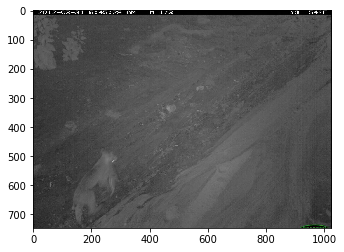

In [0]:
temp_img = cv2.imread('ter/', cv2.IMREAD_COLOR)
plt.imshow(temp_img)
plt.show()

In [0]:
np.save('X_train3.npy', X_train)

In [0]:
X_test=np.load('X_train.npy')

In [0]:
from keras.utils import to_categorical
train_labels=to_categorical(df)

In [0]:
from keras.callbacks import Callback, ModelCheckpoint
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor='val_acc', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'
)
my_new_model.fit(X_train,train_labels,validation_split=0.1,epochs=24,batch_size=32)

Train on 176477 samples, validate on 19609 samples
Epoch 1/24
176477/176477 [==============================] - 95s 539us/sample - loss: 1.7581 - acc: 0.6293 - val_loss: 1.8317 - val_acc: 0.6219
Epoch 2/24
176477/176477 [==============================] - 91s 517us/sample - loss: 1.6990 - acc: 0.6367 - val_loss: 1.8351 - val_acc: 0.5942
Epoch 3/24
176477/176477 [==============================] - 89s 507us/sample - loss: 1.6922 - acc: 0.6379 - val_loss: 1.8831 - val_acc: 0.6116
Epoch 4/24
176477/176477 [==============================] - 90s 508us/sample - loss: 1.6905 - acc: 0.6380 - val_loss: 1.8075 - val_acc: 0.6178
Epoch 5/24
176477/176477 [==============================] - 90s 510us/sample - loss: 1.6872 - acc: 0.6377 - val_loss: 1.8109 - val_acc: 0.6178
Epoch 6/24
176477/176477 [==============================] - 89s 504us/sample - loss: 1.6901 - acc: 0.6375 - val_loss: 1.7968 - val_acc: 0.6312
Epoch 7/24
176477/176477 [==============================] - 89s 506us/sample - loss: 1.6873

In [0]:
X_test.shape
X_train.shape

(196086, 32, 32, 3)

In [0]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [0]:
f=pd.read_csv('test.csv')

In [0]:
f=f["id"]

In [0]:
f.head()
#!pwd

0    bce932f6-2bf6-11e9-bcad-06f10d5896c4
1    bce932f7-2bf6-11e9-bcad-06f10d5896c4
2    bce932f8-2bf6-11e9-bcad-06f10d5896c4
3    bce932f9-2bf6-11e9-bcad-06f10d5896c4
4    bce932fa-2bf6-11e9-bcad-06f10d5896c4
Name: id, dtype: object

In [0]:
results = my_new_model.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)



In [0]:
dic={0:0,1:1,2:3,3:4,4:8,5:10,6:11,7:13,8:14,9:16,10:17,11:18,12:19,13:22}
results = [dic.get(n, n) for n in results]
results = pd.Series(results,name="Predicted")

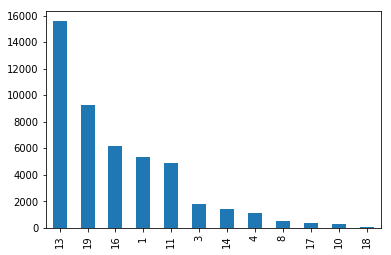

In [0]:
results.value_counts()[1N:23].plot(kind='bar')

In [0]:
submission = pd.concat([pd.Series(f,name ='Id'),results],axis = 1)

submission.to_csv("iwildcam12.csv",index=False)

In [0]:
results = my_new_model.predict(X_test)

In [0]:
kf = pd.DataFrame({'category_id':train_batch})

In [0]:
!ls
kf.to_csv('/train.csv')

MyFile.txt   ter       test.csv.zip  train.csv.zip
sample_data  test.csv  train.csv     train_images.zip


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

In [0]:
import sklearn
from sklearn.model_selection import train_test_split
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, train_labels, test_size = 0.1, random_state=2)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K


In [0]:
shift=0.2
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,zca_whitening=True,width_shift_range=shift, height_shift_range=shift)
datagen.fit(X_train)
my_new_model.fit_generator(datagen.flow(X_train,Y_train,batch_size=256) ,validation_data = (X_val,Y_val), verbose = 2,steps_per_epoch=len(X_train) / 2, epochs=5)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:339: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
39218/39218 [==============================] - 24s 612us/sample - loss: 2.1711 - acc: 0.6729
 - 1187s - loss: 1.5585 - acc: 0.6561 - val_loss: 2.1719 - val_acc: 0.6729
Epoch 2/5
39218/39218 [==============================] - 18s 470us/sample - loss: 2.5638 - acc: 0.5791
 - 1178s - loss: 1.4350 - acc: 0.6696 - val_loss: 2.5643 - val_acc: 0.5791
Epoch 3/5
39218/39218 [==============================] - 18s 460us/sample - loss: 1.9230 - acc: 0.6192
 - 1156s - loss: 1.4262 - acc: 0.6696 - val_loss: 1.9238 - val_acc: 0.6192
Epoch 4/5
39218/39218 [==============================] - 18s 450us/sample - loss: 1.9923 - acc: 0.6729
 - 1186s - loss: 1.4232 - acc: 0.6696 - val_loss: 1.9919 - val_acc: 0.6729
Epoch 5/5
39218/39218 [==============================] - 18s 459us/sample - loss: 2.0264 - acc: 0.6007
 - 1157s - loss: 1.4220 - acc: 0.6696 - val_loss: 2.0251 - val_acc: 0.6007


In [0]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
for layer in my_new_model.layers:
    weights = layer.get_weights() 

In [0]:
print (weights)

[array([[ 0.04279608, -0.03580486,  0.06214789, ..., -0.05384158,
        -0.02461667, -0.07548434],
       [ 0.00477461,  0.07198184,  0.02792431, ..., -0.01132514,
         0.05768148,  0.03573453],
       [-0.06701748, -0.06069611, -0.07493453, ...,  0.00620933,
        -0.01287109,  0.00170427],
       ...,
       [-0.03713472,  0.00339541,  0.00058474, ..., -0.03236131,
         0.06155867, -0.05740074],
       [-0.01856963,  0.01968791, -0.02190277, ..., -0.05135774,
        -0.01253545, -0.05847003],
       [ 0.03286391,  0.05114008,  0.06586831, ...,  0.06078506,
         0.04045536, -0.01425583]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)]


In [0]:
len(weights)

2

In [0]:
my_new_model.save('my_model.h5')